# 正则表达式
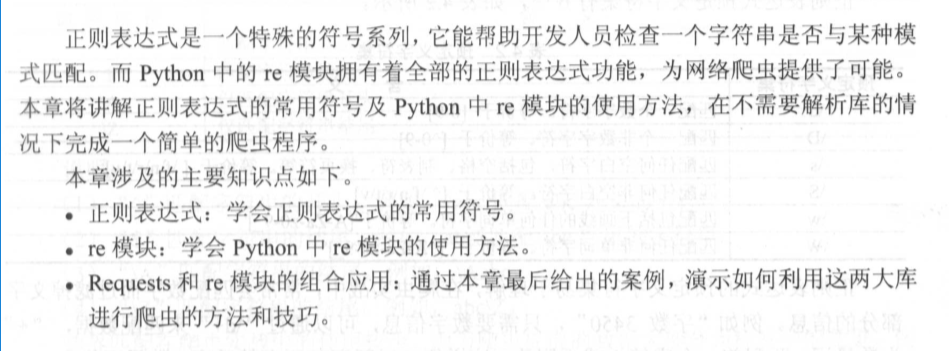

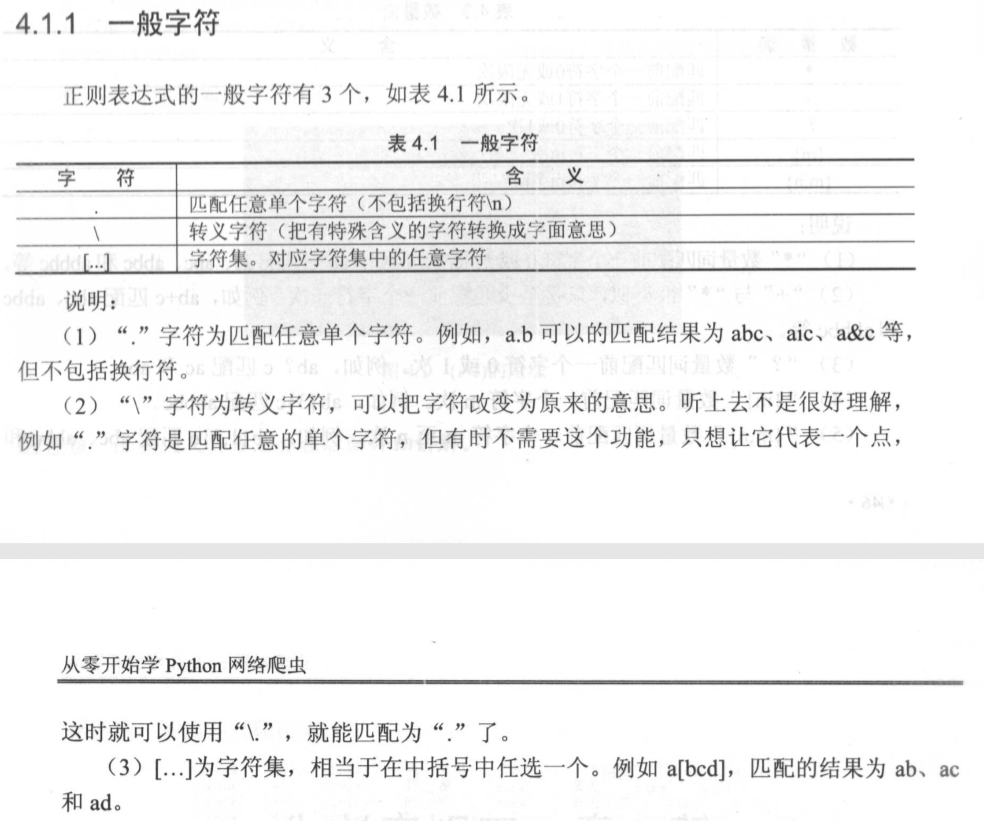

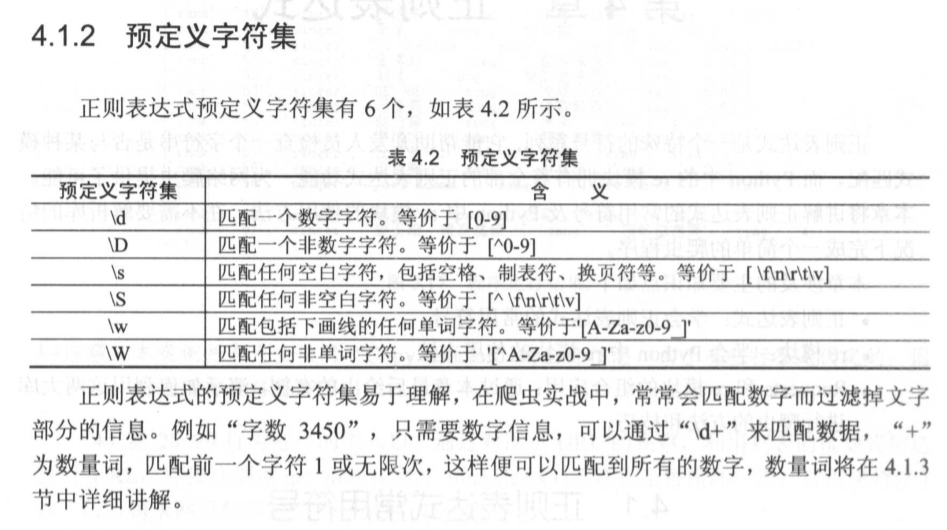

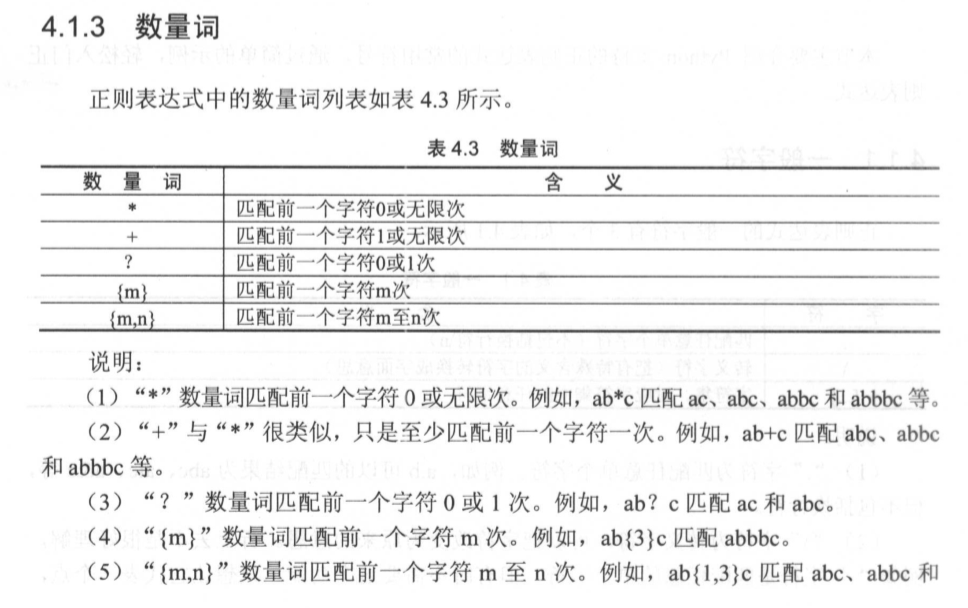
abbbc

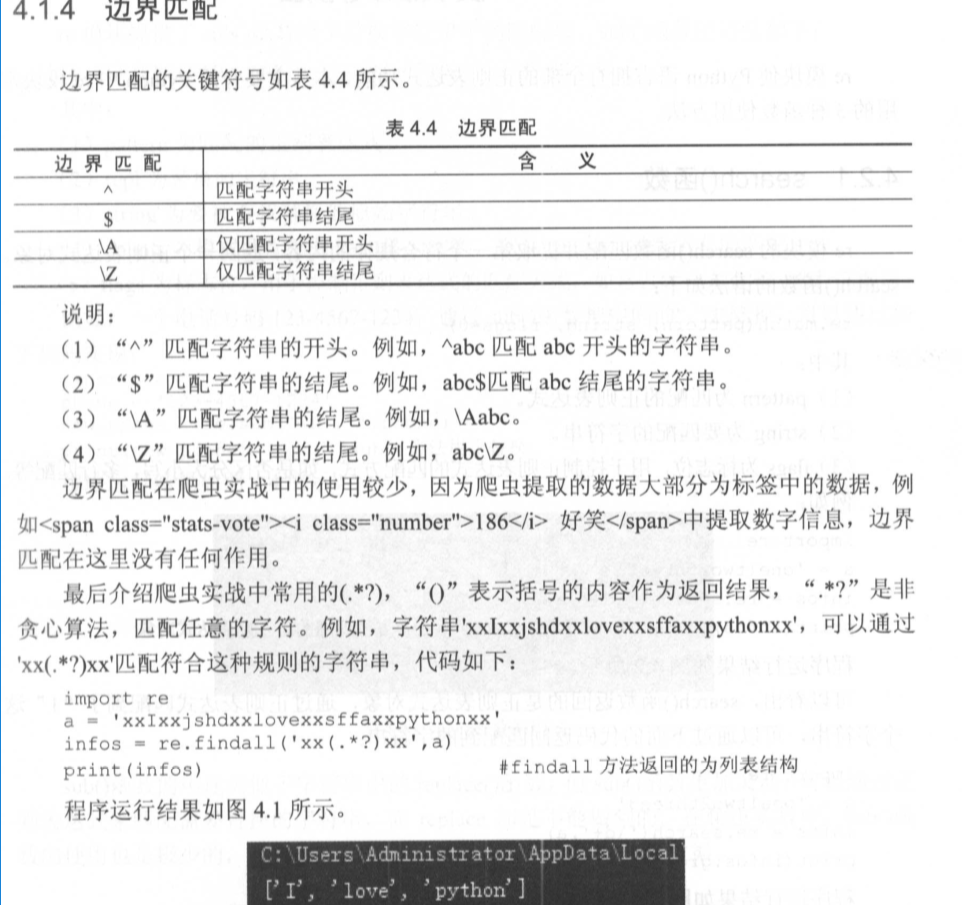
图 4.1 （*?）的用
注意： re 模块及其方法会在后面详细讲解

In [3]:
from bs4 import BeautifulSoup
import requests
import os
import time

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.108 Safari/537.36'
}

# 解决办法：
# 1、可以在request语句后面插入print(r.encoding)检查返回的数据格式是什么，如这个网站返回的数据就为：ISO-8859-1。搜索了一下相关的说明,发现 requests 只会简单地从服务器返回的响应头的 Content-Type 去获取编码,如果有 Charset 才能正确识别编码,否则就使用默认的 ISO-8859-1。
# requests 内部的 utils 提供了一个从返回 body 获取页面编码的函数,get_encodings_from_content,这样如果服务器返回的头不含 Charset,再通过 get_encodings_from_content 就可以知道页面的正确编码了。
# 原文：https://blog.csdn.net/weixin_43965622/article/details/86198697 


def req_status(url,count):
    # wb_data = requests.get(url,headers=headers)
    # wb_status = wb_data.status_code #状态码
    # econding_type = wb_data.encoding #可以看到返回的编码方式
    try:
        if wb_status == 200:
            # counts = "{},{},{},{},".format(count,'ok',wb_status,econding_type)
            counts = "{},".format(count)
            # counts = str(count + ',')
            # print(counts)
            get_info(url,counts)
            return counts
        else:
            print('Error,pass,req_status')
            # pass
    except:
        pass

def out_put_file(content):
    """存储到文本"""
    print('-----------writing----------')
    with open(file_path,'a+') as f:
        f.write(content + "\r\n")

def get_info(url,counts):
    """获取网页指定元素信息"""
    try:
        # 编码格式不一致，需要判断
        if econding_type == 'ISO-8859-1':
            r = wb_data.text.encode('ISO-8859-1').decode(requests.utils.get_encodings_from_content(wb_data.text)[0]) # 转码
            soup = BeautifulSoup(r,'lxml')
        else:
            soup = BeautifulSoup(wb_data.text,'lxml') # UTF-8
        # 获取指定元素
        titles = soup.select('body > section > div > div > div > header > h1 > a')
        genre_films = soup.select('body > section > div > div > div > header > ul > li > a')
        times = soup.select('body > section > div > div > div > header > ul > li:nth-child(2)')
        imgs = soup.select('body > section > div > div > div > article > div.video_box > div.video_img > img')
        url_paths = soup.select('body > section > div > div > div > header > h1 > a')
        video_infos = soup.select('body > section > div > div > div > article > div.video_box > div.video_info')
        for title,genre_film,time,img,url_path,video_info in zip(titles,genre_films,times,imgs,url_paths,video_infos):
            data = [
                # 'article-title':title.get_text().strip(),
                # 'genre_film':genre_film.get_text().strip(),
                # 'time':time.get_text(),
                # 'img':img.get("src"),
                # 'url_path':url_path.get("href"),
                # 'video_info':video_info.get_text().replace('\n',',')
                title.get_text().strip(),
                genre_film.get_text().strip(),
                time.get_text(),
                img.get("src"),
                url_path.get("href"),
                video_info.get_text().replace('\n',',').replace(' / ','/')
            ]
            content = "{}{}".format(counts,str(data)) # 转换为st以便写入文本
            # print(content)
            print(counts + "正在写入……")
            out_put_file(content) #调用文件操作函数
    except:
        print('Error,pass,get_info')
        pass

if __name__ == '__main__':
    count = 0
    file_path = 'C:/workspace/subject/91mjw_result1.txt'
    urls = ['https://91mjw.com/video/{}.htm'.format(i) for i in range(1,5)]
    for url in urls:
        count = count + 1 # 计数
        wb_data = requests.get(url,headers=headers) #GET请求
        wb_status = wb_data.status_code #状态码
        econding_type = wb_data.encoding #可以看到返回的编码方式
        req_status(url,count)
    # time.sleep(1)

1,正在写入……
-----------writing----------
Error,pass,get_info


In [6]:
from bs4 import BeautifulSoup
import requests
import os
import time

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.108 Safari/537.36'
}

# 解决办法：
# 1、可以在request语句后面插入print(r.encoding)检查返回的数据格式是什么，如这个网站返回的数据就为：ISO-8859-1。搜索了一下相关的说明,发现 requests 只会简单地从服务器返回的响应头的 Content-Type 去获取编码,如果有 Charset 才能正确识别编码,否则就使用默认的 ISO-8859-1。
# requests 内部的 utils 提供了一个从返回 body 获取页面编码的函数,get_encodings_from_content,这样如果服务器返回的头不含 Charset,再通过 get_encodings_from_content 就可以知道页面的正确编码了。
# 原文：https://blog.csdn.net/weixin_43965622/article/details/86198697 


def req_status(url,count):
    """获取网页状态"""
    # wb_data = requests.get(url,headers=headers)
    # wb_status = wb_data.status_code #状态码
    # econding_type = wb_data.encoding #可以看到返回的编码方式
    try:
        if wb_status == 200:
            # counts = "{},{},{},{},".format(count,'ok',wb_status,econding_type)
            counts = "{},".format(count)
            # counts = str(count + ',')
            # print(counts)
            get_info(url,counts)
            return counts
        else:
            print('Error,pass,req_status')
            # pass
    except:
        pass

def out_put_file(counts,content):
    """存储到文本"""
    print(counts + '----------------------writed')
    with open(file_path,'a+') as f:
        f.write(content + "\r\n")

def get_info(url,counts):
    """获取网页指定元素信息"""
    try:
        # 编码格式不一致，需要判断
        if econding_type == 'ISO-8859-1':
            r = wb_data.text.encode('ISO-8859-1').decode(requests.utils.get_encodings_from_content(wb_data.text)[0]) # 转码
            soup = BeautifulSoup(r,'lxml')
        else:
            soup = BeautifulSoup(wb_data.text,'lxml') # UTF-8
        # 获取指定元素
        titles = soup.select('body > section > div > div > div > header > h1 > a')
        genre_films = soup.select('body > section > div > div > div > header > ul > li > a')
        times = soup.select('body > section > div > div > div > header > ul > li:nth-child(2)')
        imgs = soup.select('body > section > div > div > div > article > div.video_box > div.video_img > img')
        url_paths = soup.select('body > section > div > div > div > header > h1 > a')
        video_infos = soup.select('body > section > div > div > div > article > div.video_box > div.video_info')
        for title,genre_film,time,img,url_path,video_info in zip(titles,genre_films,times,imgs,url_paths,video_infos):
            data = [
                # 'article-title':title.get_text().strip(),
                # 'genre_film':genre_film.get_text().strip(),
                # 'time':time.get_text(),
                # 'img':img.get("src"),
                # 'url_path':url_path.get("href"),
                # 'video_info':video_info.get_text().replace('\n',',')
                title.get_text().strip(),
                genre_film.get_text().strip(),
                time.get_text(),
                img.get("src"),
                url_path.get("href"),
                video_info.get_text().replace('\n',',').replace(' / ','/')
            ]
            content = "{}{}".format(counts,str(data)) # 转换为st以便写入文本
            # return content
            # print(counts + "正在写入……")
            out_put_file(counts,content) #调用文件操作函数
    except:
        print('Error,pass,get_info')
        pass

if __name__ == '__main__':
    count = 0
    file_path = 'C:/workspace/subject/91mjw_result.txt'
    urls = ['https://91mjw.com/video/{}.htm'.format(i) for i in range(1,30)]
    for url in urls:
        count = count + 1 # 计数
        wb_data = requests.get(url,headers=headers) #GET请求
        wb_status = wb_data.status_code #状态码
        econding_type = wb_data.encoding #可以看到返回的编码方式
        req_status(url,count)
    # time.sleep(1)

1,----------------------writed
Error,pass,get_info
18,----------------------writed
19,----------------------writed
20,----------------------writed
21,----------------------writed
22,----------------------writed
23,----------------------writed
Error,pass,get_info
26,----------------------writed
27,----------------------writed
28,----------------------writed
29,----------------------writed
